In [13]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic.csv')

**Reasoning**:
Display the first few rows and the column information of the dataframe to understand its structure and data types.



In [14]:
display(df.head())
display(df.info())

,Titanic_Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Titanic_Data  50 non-null     object
 1   Unnamed: 1    50 non-null     object
 2   Unnamed: 2    50 non-null     object
 3   Unnamed: 3    50 non-null     object
 4   Unnamed: 4    50 non-null     object
 5   Unnamed: 5    49 non-null     object
 6   Unnamed: 6    50 non-null     object
 7   Unnamed: 7    50 non-null     object
 8   Unnamed: 8    50 non-null     object
 9   Unnamed: 9    50 non-null     object
 10  Unnamed: 10   10 non-null     object
 11  Unnamed: 11   50 non-null     object
dtypes: object(12)
memory usage: 4.8+ KB


None

## Summary statistics

### Subtask:
Calculate and display summary statistics for numerical and categorical columns to understand the data distribution.


**Reasoning**:
Display descriptive statistics for both numerical and categorical columns to understand the data distribution.



In [15]:
display(df.describe())
display(df.describe(include='object'))

,Titanic_Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,50,50,50,50,50,49,50,50,50,50,10,50
unique,50,3,4,50,3,25,6,5,50,41,10,4
top,PassengerId,0,3,Name,male,22,0,0,Ticket,8.05,Cabin,S
freq,1,29,31,1,27,12,27,41,1,4,1,30


,Titanic_Data,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
count,50,50,50,50,50,49,50,50,50,50,10,50
unique,50,3,4,50,3,25,6,5,50,41,10,4
top,PassengerId,0,3,Name,male,22,0,0,Ticket,8.05,Cabin,S
freq,1,29,31,1,27,12,27,41,1,4,1,30


In [16]:
print(df.isnull().sum())

Titanic_Data     0
Unnamed: 1       0
Unnamed: 2       0
Unnamed: 3       0
Unnamed: 4       0
Unnamed: 5       1
Unnamed: 6       0
Unnamed: 7       0
Unnamed: 8       0
Unnamed: 9       0
Unnamed: 10     40
Unnamed: 11      0
dtype: int64


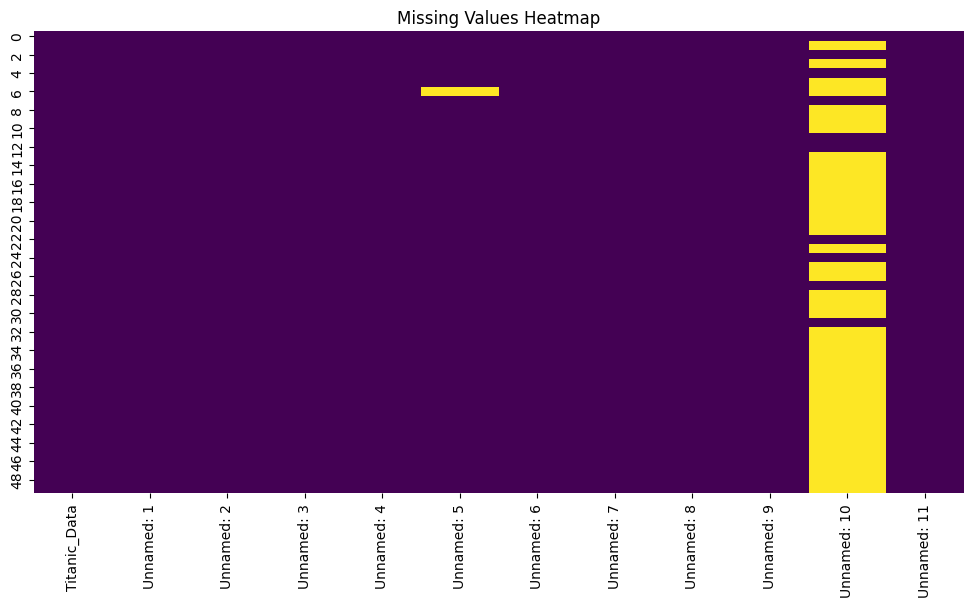

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

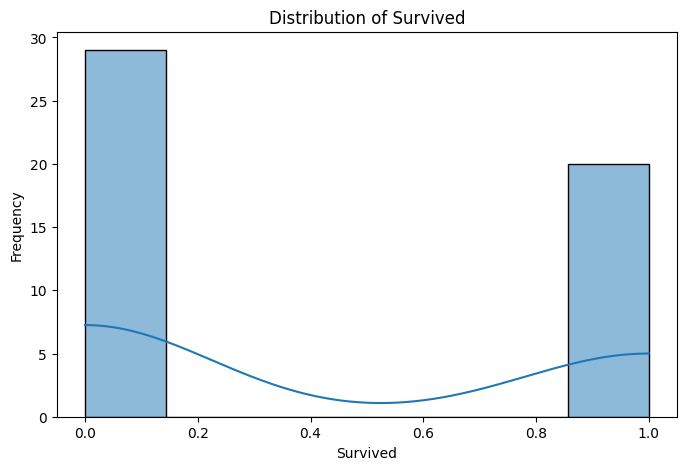

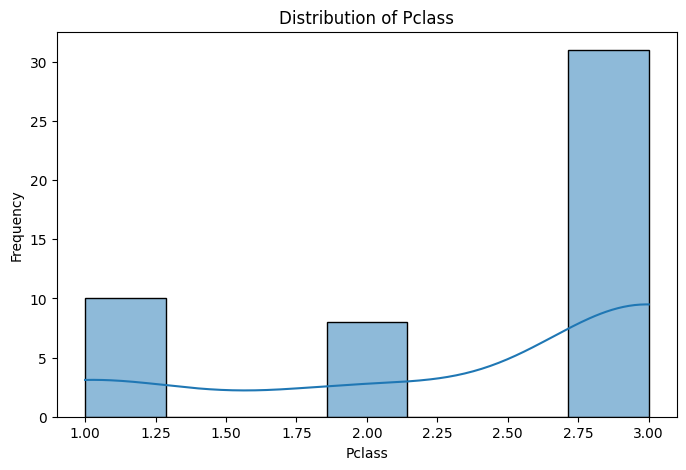

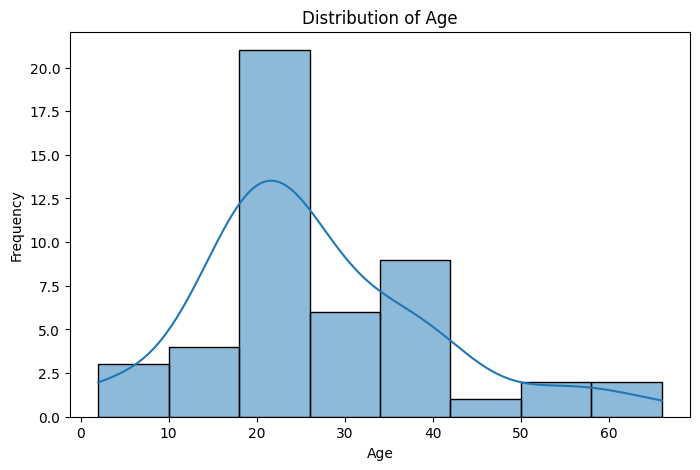

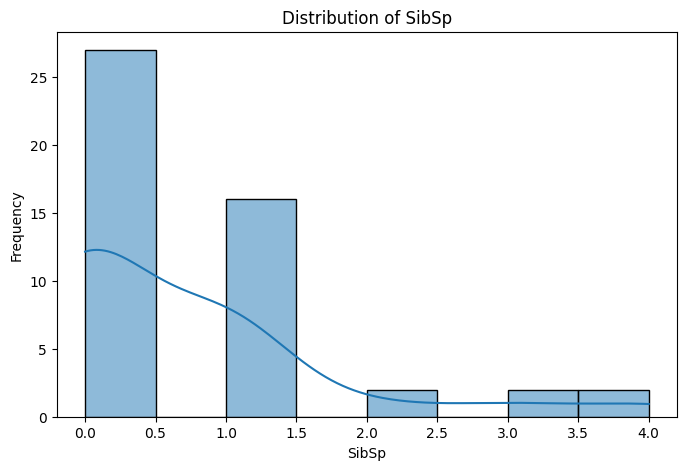

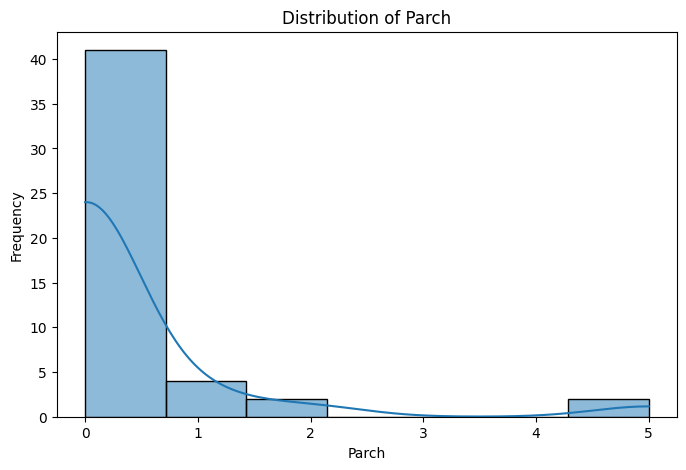

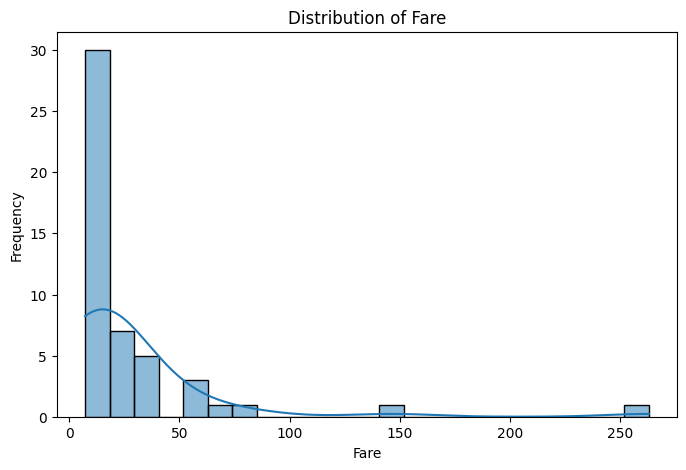

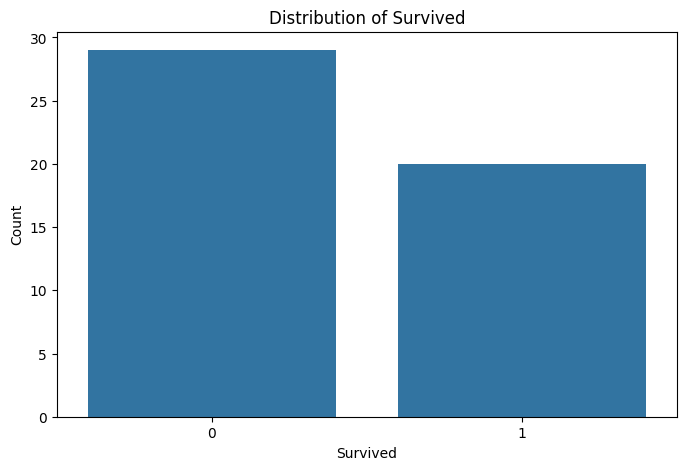

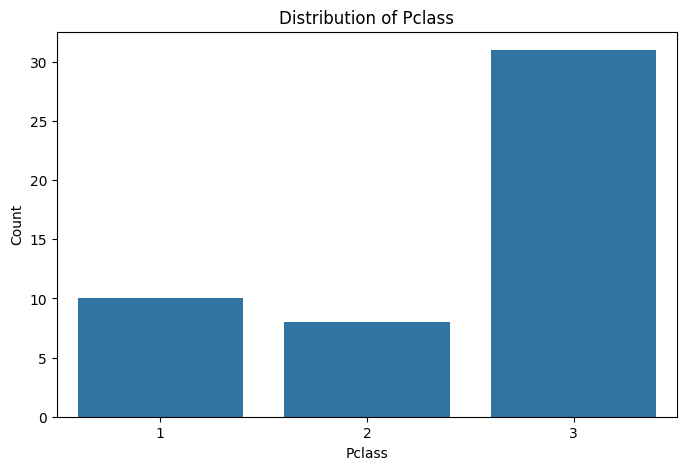

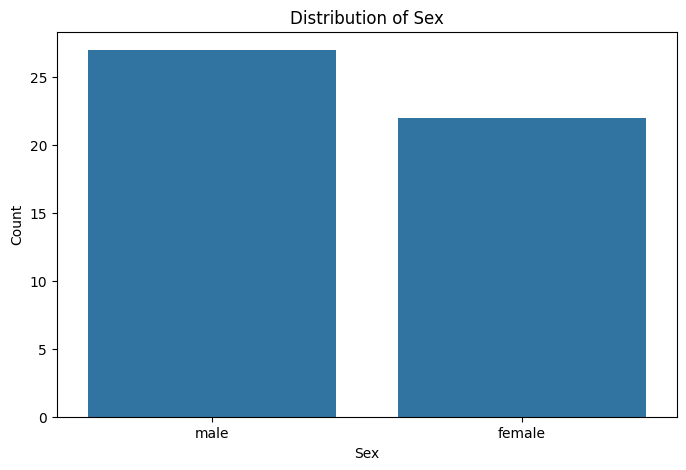

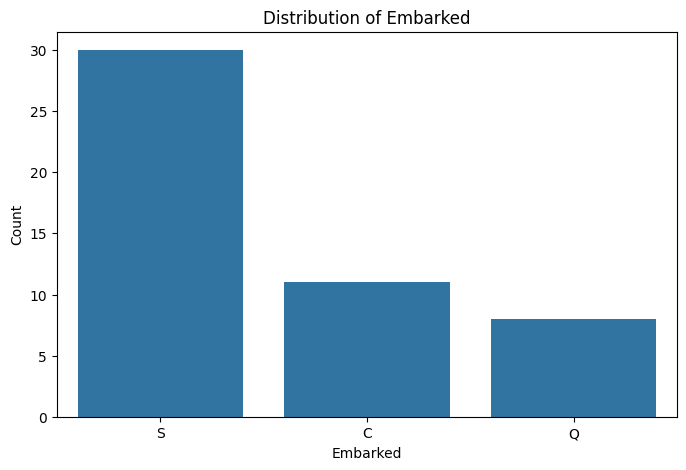

In [18]:
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

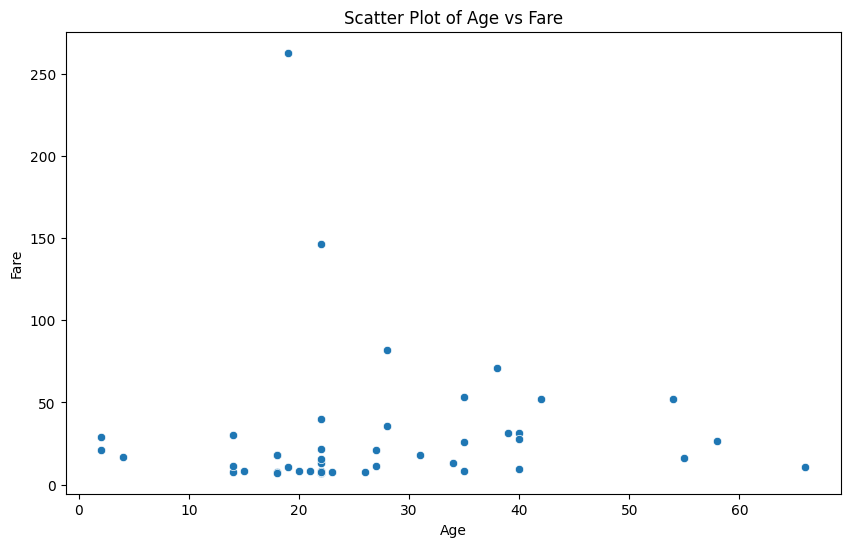

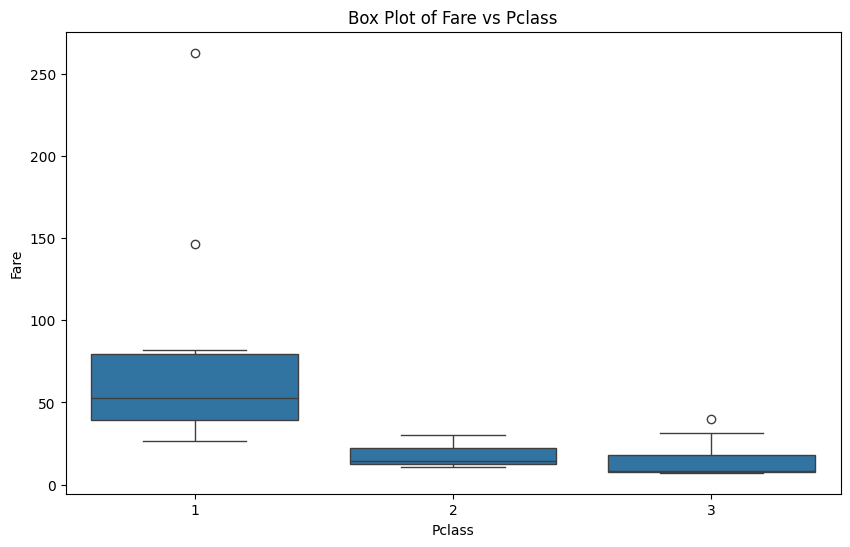

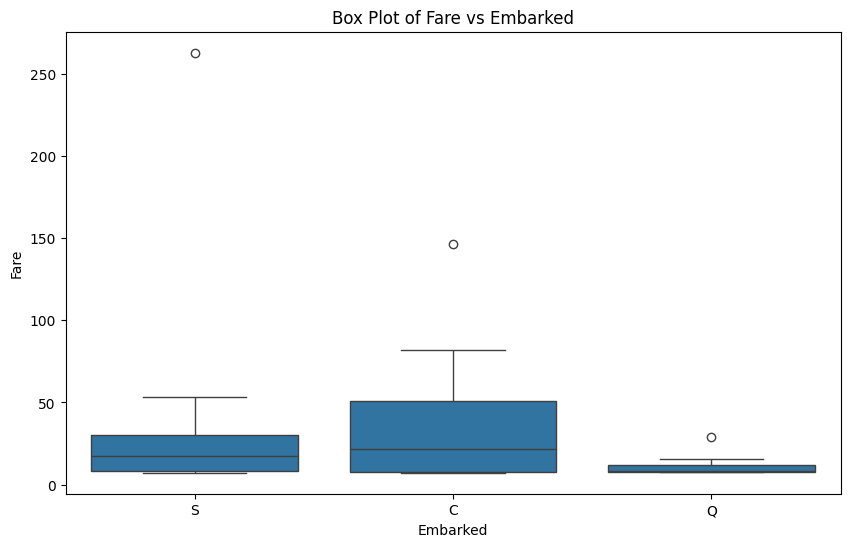

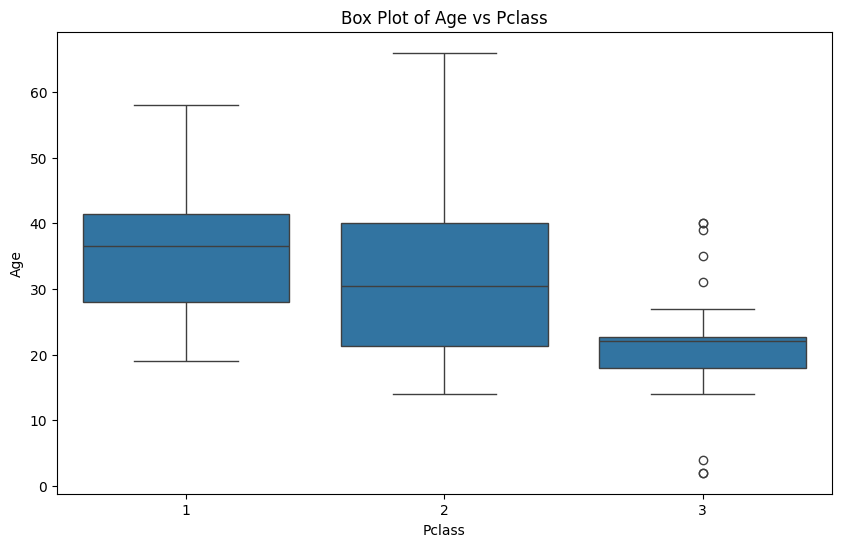

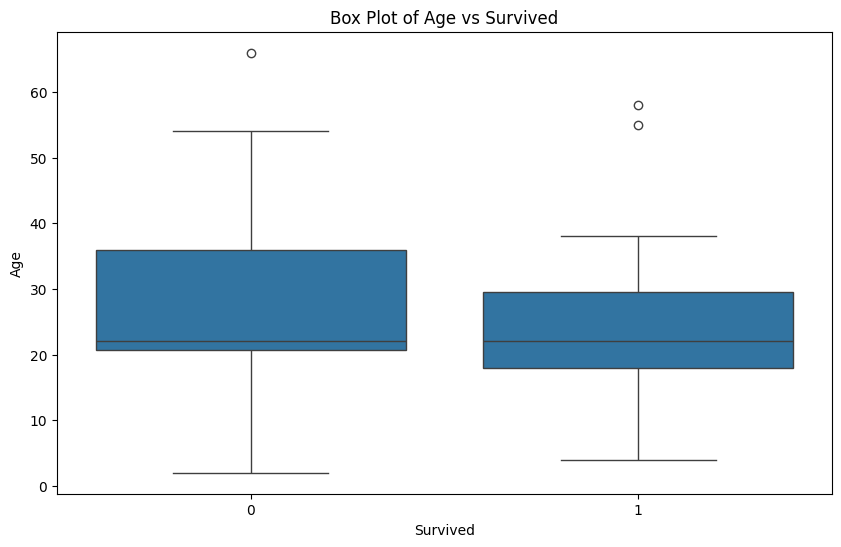

,Survived,Pclass,Age,SibSp,Parch,Fare
0,,,,,,
Survived,1.000000,-0.183506,-0.065775,-0.322496,-0.169770,-0.052178
Pclass,-0.183506,1.000000,-0.486304,0.035569,0.149304,-0.587663
Age,-0.065775,-0.486304,1.000000,-0.356110,0.053349,0.026090
SibSp,-0.322496,0.035569,-0.356110,1.000000,0.293535,0.417187
Parch,-0.169770,0.149304,0.053349,0.293535,1.000000,0.212438
Fare,-0.052178,-0.587663,0.026090,0.417187,0.212438,1.000000


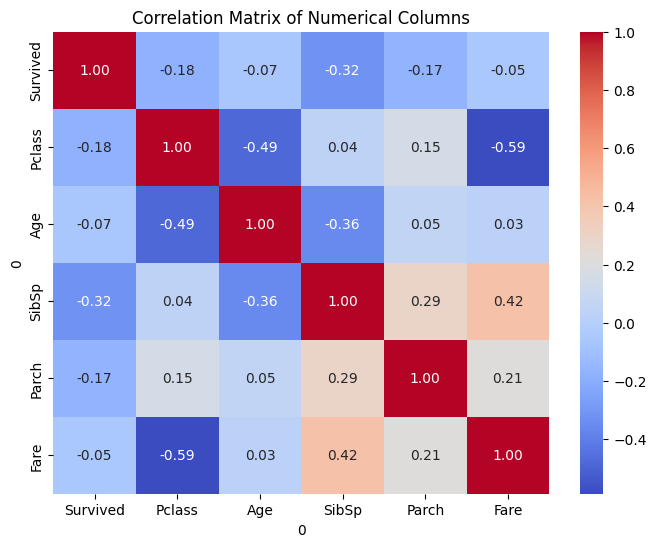

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Age vs Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Box plot of Fare vs Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Box Plot of Fare vs Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# Box plot of Fare vs Embarked
plt.figure(figsize=(10, 6))
sns.boxplot(x='Embarked', y='Fare', data=df)
plt.title('Box Plot of Fare vs Embarked')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()

# Box plot of Age vs Pclass
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Box Plot of Age vs Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# Box plot of Age vs Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot of Age vs Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

# Calculate and display the correlation matrix
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

## Handle missing values

### Subtask:
Based on the analysis, decide on a strategy for handling missing values (imputation, dropping, etc.).


**Reasoning**:
Print the number of missing values for each column to understand the extent of missing data and then implement a strategy to handle them based on the analysis of missing values in previous steps. Finally, print the missing values again to verify the strategy was successful.



In [20]:
print("Missing values before handling:")
print(df.isnull().sum())

# Drop the 'Cabin' column
df = df.drop('Cabin', axis=1)

# Impute missing values in 'Embarked' with the mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Impute missing values in 'Age' with the mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Impute missing values in 'Fare' with the mean
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values before handling:
0
PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             1
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin          40
Embarked        0
dtype: int64

Missing values after handling:
0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
